<a href="https://colab.research.google.com/github/Rayani00/python/blob/master/end_to_end_heart_disease_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning model to say whether or not a person got heart disease or not 

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools 
We're going to use pandas, matplotlib and NumPy for data analysis and manipulation 



In [65]:
# Import all the tools we need 

# Regular EDA and ploting libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
#Cause we want our plots to appear in the notebook

# Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance


## Load the data

In [2]:
df = pd.read_csv("/content/heart-disease.csv")
df.describe # To get informations about the data we'll be using 

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

## Data exploration (exploratory data analysis or EDA)
1. What questions are you tying to solve 
2. What kind of data do we have and how do we treat different types 
3. What's missing from the data and how do you dead with it  
4. What are the outliers and why should you care about them 
5. How can you change add or remove features to get more of your data

In [3]:
# Let's find out how many of each class do we have 
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

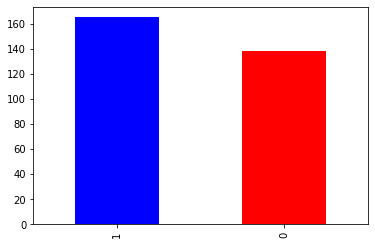

In [4]:
# Give it a visualisation 
df.target.value_counts().plot(kind='bar', color=['blue', 'red']);

In [5]:
# Check if is there some missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart disease frquency according to Sex 

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Compare target column to sex column using a crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


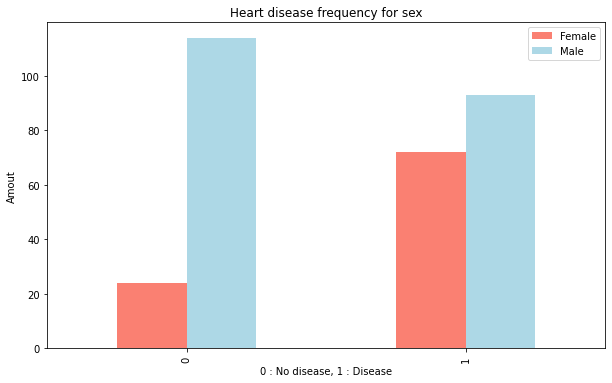

In [8]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=["salmon", "lightblue"]);
plt.title("Heart disease frequency for sex")
plt.xlabel("0 : No disease, 1 : Disease")
plt.ylabel("Amout")
plt.legend(["Female", "Male"]);

### Age vs. Heart rate for heart disease

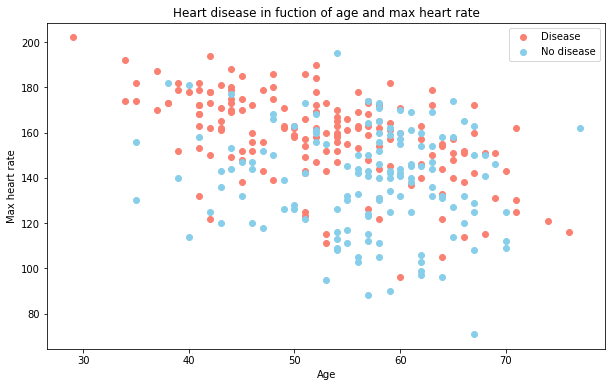

In [9]:
# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");

# Scatter with negative examples 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="skyblue");

# Add some helpful informations to the plot
plt.title("Heart disease in fuction of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No disease"]);

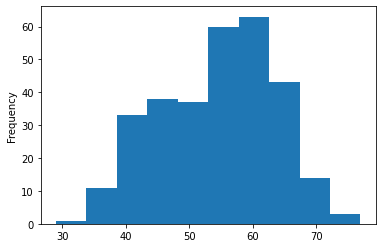

In [10]:
# Check the distribution of the age column with a histogram 
df.age.plot(kind='hist');

### Heart disease frequency per chest pain type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [11]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


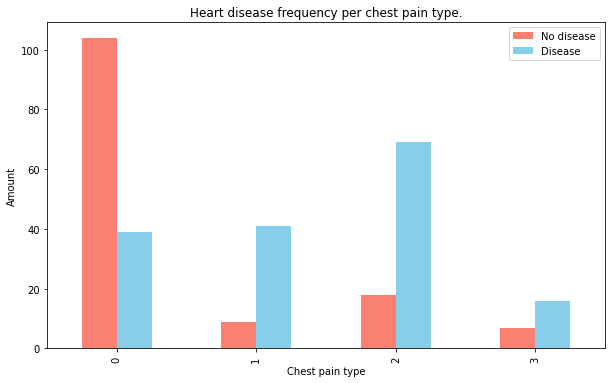

In [12]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=["salmon", "skyblue"])
plt.title("Heart disease frequency per chest pain type.")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"]);

In [13]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Remarque : Quand la valeur est grande et positive cela signifie 
qu'il y une corréaltion positive entre les deux valeurs autrement dit
plus la valeur de thalach est grande par exmple, plus la valeur de target l'est aussi.
L'inverse pour les valeurs négatives 

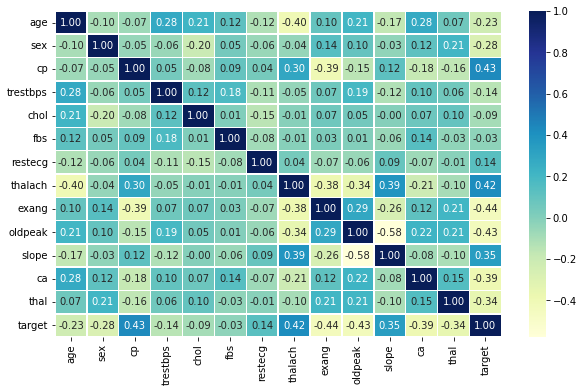

In [14]:
# Let's make our correlation matrix a bit more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap='YlGnBu');

## 5. Modeling

In [15]:
# Split our data into X and y 
X = df.drop("target", axis=1)
y = df.target

In [16]:
# Split data into train and test sets 

# Set up a random seed 
np.random.seed(22)

#Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


We're going to try 3 different machine learning models : 
1. Logistic Regression 
2. K-Nearest Nieghbours Classifier 
3. Random forest classifier

In [17]:
# Put models into a dictionary 
models = {"Logistic Regression" : LogisticRegression(),
          "K-Nearest Neighbours Classifier" : KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier(),
          "Gaussian Naive Bayes" : GaussianNB(), 
          "Decision Tree Classifier" : DecisionTreeClassifier()}

# Create a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test) : 
  """  
  Fits and evaluates given machine learning models, 
  models : a dictionary of Scikit-Learn machine learning models
  X_train : our training data (no labels)
  X_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """
  # Set up random seed 
  np.random.seed(32)

  # Create a dictionary to keep models scores 
  model_scores = {}

  # Loop through the models 
  for name, model in models.items() : 
    # Fit the model to the data 
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to the dicionary 
    model_scores[name] = model.score(X_test, y_test)
  return model_scores


In [18]:
# Let's use the function we've created earlier
models_scores = fit_and_score(models=models, 
                              X_train=X_train, 
                              X_test=X_test, 
                              y_train=y_train, 
                              y_test=y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Model comparision 

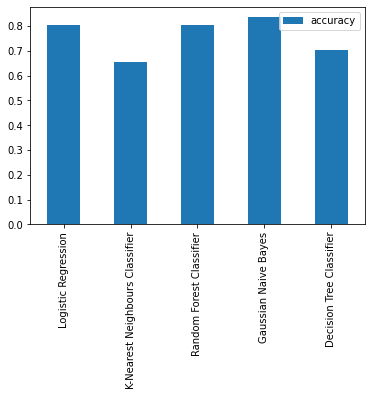

In [19]:
# Turn the dictionary into a DataFrame
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot(kind='bar');

In [20]:
model_compare

,Logistic Regression,K-Nearest Neighbours Classifier,Random Forest Classifier,Gaussian Naive Bayes,Decision Tree Classifier
accuracy,0.803279,0.655738,0.803279,0.836066,0.704918


Now we've got a baseline model and we know a model's first predictions aren't always what we should baased our next steps off. What should we do ? 

Lets look at the following : 
* Hyperparameters tuning 
* Feature importance
* Confusion matrix 
* Cross-validation 
* Precision 
* Recall 
* F1 Score 
* Classification report 
* ROC Curve 
* Area under the curve (AUC)  

## Hyperparameter tuning (by hand)



In [21]:
# Let's tune KNN 
train_scores = []
test_scores = []

# Create a list of different values of n_neighbors 
neighbors = range(1, 21)

# Instanciate KNN 
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors : 
  knn.set_params(n_neighbors=i)

  # Fit the algorithm 
  knn.fit(X_train, y_train)

  #Update the trainig scores list 
  train_scores.append(knn.score(X_train, y_train))

  #Update the test scores list 
  test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data : 65.57%


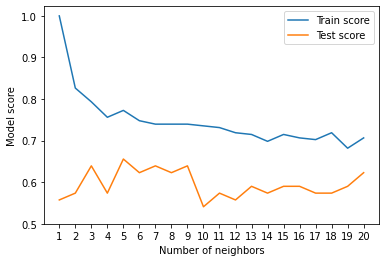

In [22]:
# Let's make it a bit more visual 
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(range(1, 21, 1))
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f'Maximum KNN score on the test data : {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV 

We're going to tune : 
* LogisticRegression()
* RandomForestClassifier()

In [23]:
# Create a hyperparameter grid for LogisticRegreesion 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf" :np.arange(1, 20, 2)}


Now we've got hyperparameters grid setup for each of our models, let's tune them using RandomizeSearchCV

In [24]:
# Tune LogisticRegression 

# Set up a random seed
np.random.seed(23)

# Setup random hyperparameters search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train, y_train)

# Check the best parameters 
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 11.288378916846883, 'solver': 'liblinear'}

In [25]:
# Let's evaluate the new model
rs_log_reg.score(X_test , y_test)

0.819672131147541

In [26]:
# Tune the RandomForestClassifier 

# Set up a random seed 
np.random.seed(44)

#setup hyperparams search for RandomForestClassifier
rs_rand_for_cl = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions=rf_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)

# Fit random hyperparams search model for RandomForestClassifier
rs_rand_for_cl.fit(X_train, y_train)

# Check the best params
rs_rand_for_cl.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 3,
 'min_samples_leaf': 13,
 'min_samples_split': 8,
 'n_estimators': 360}

In [27]:
# Evaluate the model 
rs_rand_for_cl.score(X_test, y_test)

0.8032786885245902

In [28]:
# Tune the Gaussian Naive Bayes 

# Set up a random seed
np.random.seed(23)

# Setup hyperparams for Gaussian Naive Bayes
params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gs_GNB = GridSearchCV(estimator=GaussianNB(),
                      param_grid=params_NB,
                      cv=5,
                      verbose=True, 
                      scoring='accuracy')

# Fit random hyperparams search model for Gaussian Naive Bayes
gs_GNB.fit(X_train, y_train)

# Check the best params 
gs_GNB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 2.848035868435799e-05}

In [29]:
# Evaluate the model 
gs_GNB.score(X_test, y_test)

0.8360655737704918

## Evaluating our tuned machine learning classifier, beyond acccuracy 

* ROC curve  and AUC score 
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-Score 

To make comparisions and evaluate our trained model, we first need to make predictions 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


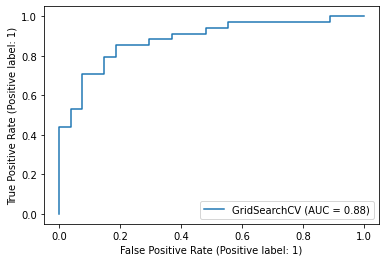

In [33]:
# Plot the ROC curve and calculate AUC metric 
plot_roc_curve(gs_GNB, X_test, y_test)

In [36]:
y_preds = gs_GNB.predict(X_test)

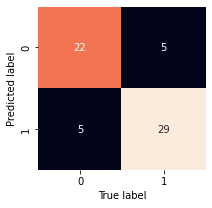

In [37]:
# Confusion matrix
# Create a function for our confusion matrix
def plot_conf_mat(y_test, y_preds) : 
  """
  Plots a nice looking confusion matrix using seaborn's heatmp
  """
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)  

In [38]:
# Let's create a classification report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Calculate evaluation metrics using cross-validation 

We're going to calculate prediction, recall and f1 score of our model using cross_validation and to do so we'll be using 'cross_val_score()'

In [41]:
# Check best hyperp
gs_GNB.best_params_

{'var_smoothing': 2.848035868435799e-05}

In [42]:
# Create a new classifier with the best parameters 
clf = GaussianNB(var_smoothing=2.848035868435799e-05)

In [48]:
# Cross validated accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'Accuracy : {np.mean(cv_acc)}')

Accuracy : 0.8148633879781422


In [49]:
# Cross validated precision 
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(f'Precision : {np.mean(cv_precision)}')

Precision : 0.8118109994580582


In [50]:
# Cross validated f1_score  
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f'f1 : {np.mean(cv_f1)}')

f1 : 0.8376865382457627


In [52]:
 # Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(f'Recall : {np.mean(cv_recall)}') 

Recall : 0.8666666666666666


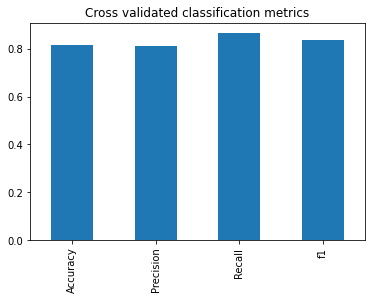

In [61]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                           'Precision':np.mean(cv_precision),
                           'Recall':np.mean(cv_recall),
                           'f1':np.mean(cv_f1)},
                          index=[0])

cv_metrics.T.plot(kind='bar', title='Cross validated classification metrics', legend=False)

### Feature Importance

feature importance is another way as asking, "which features contributed most to the outcome of the model and how did they contribute?"

Finding features importance is different for each machine learning model

Let's find the features importance for our Gaussian Naive Bayes model

In [71]:
# Fit and instance our model 
clf = GaussianNB(var_smoothing=2.848035868435799e-05)
clf.fit(X_train, y_train)


# Remarque : on utilise l'atribut 'coef_' à la place de permutation dans la majorité des cas
# Check the permutation importance
imps = permutation_importance(clf, X_test, y_test)
print(imps.importances_mean)


[-0.00327869  0.01311475  0.0557377   0.02295082  0.00327869  0.00655738
  0.03606557  0.01967213  0.01639344  0.03934426 -0.00327869  0.04590164
  0.04262295]


In [69]:
# Match coef's features to columns 
feature_dict = dict(zip(df.columns, list(imps.importances_mean)))
feature_dict


{'age': -0.006557377049180291,
 'ca': 0.05573770491803283,
 'chol': -0.013114754098360581,
 'cp': 0.04262295081967218,
 'exang': 0.013114754098360692,
 'fbs': 0.006557377049180335,
 'oldpeak': 0.06229508196721319,
 'restecg': 0.019672131147541006,
 'sex': 0.01311475409836067,
 'slope': 0.0032786885245901674,
 'thal': 0.049180327868852514,
 'thalach': 0.019672131147541027,
 'trestbps': 0.02622950819672134}

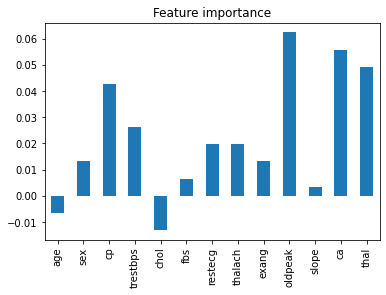

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title='Feature importance', legend=False)

## 6. Experimentation 



1.   Coudl you collect more data ? 
2.   Could you try a better model ? (CatBoost or XGBoost) 
3. Could we improve the current models ? (beyond what we've done so far) 

>If your model is good enough how'd you export it and share it with others 




